In [67]:
import os, shutil
import pandas as pd
from keras import saving
import matplotlib.pyplot as plt
from keras import models, layers
from keras import optimizers
# convert images to tensors
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.applications import VGG16

In [2]:
# Unzipped dataset path
origial_dataset_dir = 'D:\\Personal\\DataSets\\Dogs_VS_Cats\\train'

In [3]:
# Location to make small directory
base_dir = 'C:\\Users\\nimap\\MyJupyter\\Train\\Deep\\Dogs-VS-Cats\\small'

In [4]:
# Create small directory
os.mkdir(base_dir)

In [5]:
# Create train, validation and test directory
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [6]:
# Create cats & dogs folder in train directory
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [7]:
# create validation folders for cat and dog
validation_cats_directory = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_directory)

validation_dogs_directory = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_directory)

In [8]:
# Create test folder for cats and dogs
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [9]:
# Copy 1000 cats image to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames :
    src = os.path.join(origial_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
# Copy 500 cats image to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames :
    src = os.path.join(origial_dataset_dir, fname)
    dts = os.path.join(validation_cats_directory, fname)
    shutil.copyfile(src, dts)

In [11]:
# copy 500 cats image to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames :
    src = os.path.join(origial_dataset_dir, fname)
    dts = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dts)

In [12]:
# Copy 1000 dogs image to train_cats_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames :
    src = os.path.join(origial_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
# Copy 500 dogs image to validation_cats_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]

for fname in fnames :
    src = os.path.join(origial_dataset_dir, fname)
    dts = os.path.join(validation_dogs_directory, fname)
    shutil.copyfile(src, dts)

In [14]:
# copy 500 dogs image to test_cats_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]

for fname in fnames :
    src = os.path.join(origial_dataset_dir, fname)
    dts = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dts)

In [15]:
# Counts number of images in each folder
print('Total training cat images : ', len(os.listdir(train_cats_dir)))
print('Total validation cat images : ', len(os.listdir(validation_cats_directory)))
print('Total test cat images : ', len(os.listdir(test_cats_dir)))
print('_' * 45)
print('Total training cat images : ', len(os.listdir(train_dogs_dir)))
print('Total validation cat images : ', len(os.listdir(validation_dogs_directory)))
print('Total test cat images : ', len(os.listdir(test_dogs_dir)))

Total training cat images :  1000
Total validation cat images :  500
Total test cat images :  500
_____________________________________________
Total training cat images :  1000
Total validation cat images :  500
Total test cat images :  500


## Modeling

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [18]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
             loss='binary_crossentropy', 
             metrics=['acc'])

In [19]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir, # Target directory
    target_size=(150, 150), # resize images
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # Target directory
    target_size=(150, 150), # resize images
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
for data_batch, label_batch in train_generator :
    print('Data batch Shape : ', data_batch.shape)
    print('Label Batch Shape : ', label_batch.shape)
    break

Data batch Shape :  (20, 150, 150, 3)
Label Batch Shape :  (20,)


In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 34s 335ms/step - loss: 0.6919 - acc: 0.5205 - val_loss: 0.6836 - val_acc: 0.5590
Epoch 2/30
100/100 [==============================] - 32s 321ms/step - loss: 0.6768 - acc: 0.5680 - val_loss: 0.6818 - val_acc: 0.5410
Epoch 3/30
100/100 [==============================] - 35s 345ms/step - loss: 0.6656 - acc: 0.5975 - val_loss: 0.6546 - val_acc: 0.6200
Epoch 4/30
100/100 [==============================] - 32s 322ms/step - loss: 0.6456 - acc: 0.6315 - val_loss: 0.6489 - val_acc: 0.6110
Epoch 5/30
100/100 [==============================] - 30s 304ms/step - loss: 0.6180 - acc: 0.6740 - val_loss: 0.6162 - val_acc: 0.6610
Epoch 6/30
100/100 [==============================] - 31s 309ms/step - loss: 0.5847 - acc: 0.6895 - val_loss: 0.6017 - val_acc: 0.6680
Epoch 7/30
100/100 [==============================] - 30s 302ms/step - loss: 0.5577 - acc: 0.7050 - val_loss: 0.5989 - val_acc: 0.6750
Epoch 8/30
100/100 [==============================] - 3

### Save model

In [22]:
# model.save('cats_and_dogs_small_1.keras')

In [23]:
# loaded_model = saving.load_model("cats_and_dogs_small_1.keras")

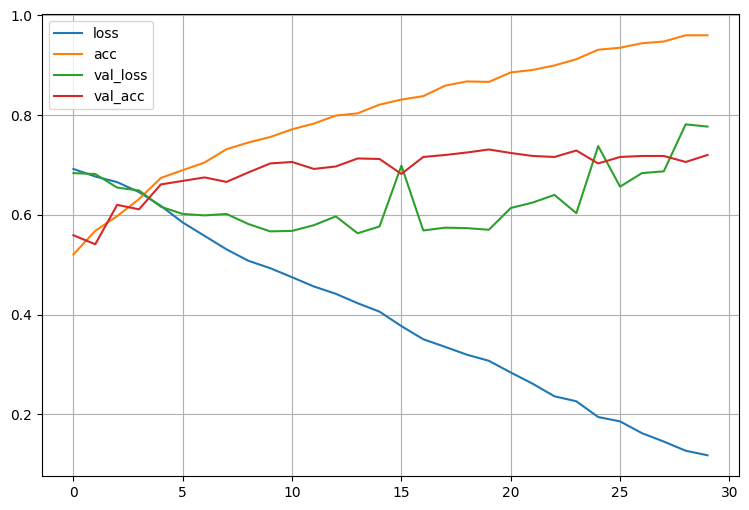

In [24]:
pd.DataFrame(history.history).plot(figsize=(9, 6))
plt.grid()
plt.show()

## تقویت داده

In [25]:
# Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


# Compile
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
             loss='binary_crossentropy', 
             metrics=['acc'])

In [63]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir, # Target directory
    target_size=(150, 150), # resize images
    batch_size=20,
    class_mode='binary',
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # Target directory
    target_size=(150, 150), # resize images
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [64]:
for data_batch, label_batch in train_generator :
    print('Data batch Shape : ', data_batch.shape)
    print('Label Batch Shape : ', label_batch.shape)
    break

Data batch Shape :  (10, 150, 150, 3)
Label Batch Shape :  (10,)


In [65]:
history = model.fit(
    train_generator,
    steps_per_epoch=200,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=100
)

Epoch 1/20
200/200 [==============================] - 27s 136ms/step - loss: 0.4500 - acc: 0.7950 - val_loss: 0.4248 - val_acc: 0.8040
Epoch 2/20
200/200 [==============================] - 28s 141ms/step - loss: 0.4416 - acc: 0.7955 - val_loss: 0.4349 - val_acc: 0.7900
Epoch 3/20
200/200 [==============================] - 29s 146ms/step - loss: 0.4405 - acc: 0.7895 - val_loss: 0.5018 - val_acc: 0.7690
Epoch 4/20
200/200 [==============================] - 30s 149ms/step - loss: 0.4587 - acc: 0.7680 - val_loss: 0.4418 - val_acc: 0.8040
Epoch 5/20
200/200 [==============================] - 30s 152ms/step - loss: 0.4258 - acc: 0.8080 - val_loss: 0.5126 - val_acc: 0.7690
Epoch 6/20
200/200 [==============================] - 31s 153ms/step - loss: 0.4439 - acc: 0.7890 - val_loss: 0.5130 - val_acc: 0.7400
Epoch 7/20
200/200 [==============================] - 30s 148ms/step - loss: 0.4470 - acc: 0.7965 - val_loss: 0.4117 - val_acc: 0.8060
Epoch 8/20
200/200 [==============================] - 3

## Save model

In [ ]:
# model.save('cats_and_dogs_small_2.keras')

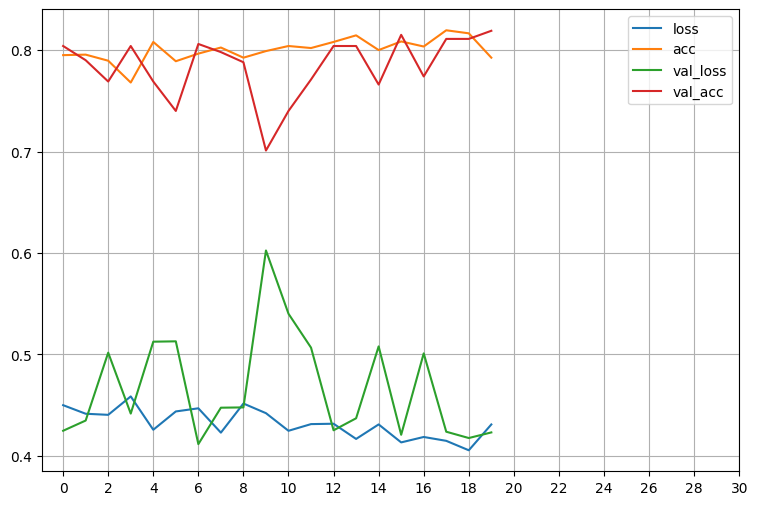

In [66]:
pd.DataFrame(history.history).plot(figsize=(9, 6))
plt.xticks(range(0, 31, 2))
plt.grid()
plt.show()

## مدل از پیش ساخته

In [70]:
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

In [71]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     